# 1 Prediciendo usando un data set precargado desde Scikit-lean

1.1 Descripción

Se usa un set de datos que viene pre cargado en scikit-learn que tiene relación con la diabetes.
La base se toma desde: 
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#diabetes = datasets.load_diabetes(as_frame=True)
diabetes = datasets.load_diabetes()
diabetes_X, diabetes_y = pd.DataFrame(diabetes.data,columns=diabetes.feature_names),pd.DataFrame(diabetes.target,columns=['target']) 

In [3]:
diabetes_X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [4]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [5]:
# Se muestran los datos Target
diabetes_y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


1.1.1 Comentarios
Del resulatdo anterior es posible apreciar que se tienen 442 observaciones con 10 características y una variable independiente (y)
y = a+b1x1 +b2x2 +...+b10x10
donde x1 representa a cada una de las características que se incluyen en el set de datos.
Sin embargo, para simplificar el problema solo se va a trabajar con una de las características, dejando la ecuación de la forma:
y = a + b1x1
De esta forma se tiene una variable indepediente (que es la que será predecida) y una variable
independiente (predictora)

In [6]:
result = pd.concat([pd.DataFrame(diabetes_X),pd.DataFrame(diabetes_y)], axis=1)

In [7]:
result

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


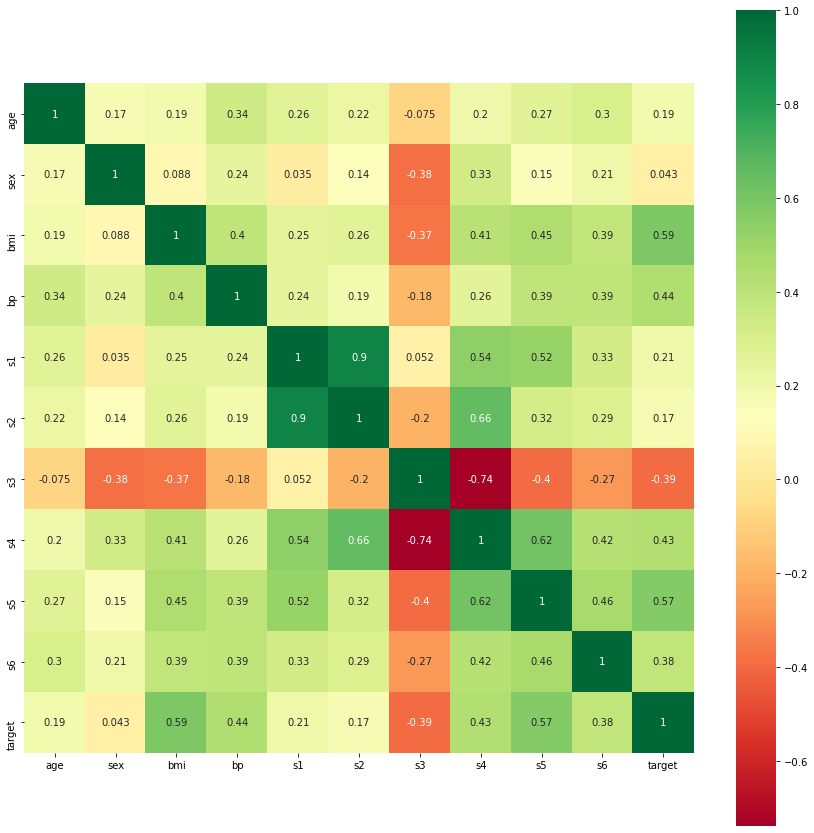

In [8]:
plt.figure(figsize=(15,15))
p=sns.heatmap(result.corr(), annot=True,cmap='RdYlGn',square=True)

Seleccionamos la variable bmi porque tiene la mayor correlación con la variable Target y reservmos las últimas 20 observaciones para validar el modelo

In [ ]:
diabetes_X_train = diabetes_X['bmi'].iloc[:-20]
diabetes_X_train

In [ ]:
diabetes_X_test = diabetes_X['bmi'].iloc[-20:]
diabetes_X_test

In [ ]:
diabetes_y_train = diabetes_y[:-20]
diabetes_y_train

In [ ]:
diabetes_y_test = diabetes_y[-20:]
diabetes_y_test

In [ ]:
diabetes_X_train= pd.DataFrame(diabetes_X_train)    

In [ ]:
diabetes_X_test= pd.DataFrame(diabetes_X_test)    

In [ ]:
diabetes_X_train.shape

In [ ]:
diabetes_X_test.shape

1.1.2 Comentarios
En el código anterior se selecciona una de las características y se divide el set de datos en 2 subconjuntos: entrenamiento y validación.
Por ahora esta división se realiza de manera fija, más adelante se verá que esto se debe hacer de forma aleatoria.
La misma división se hace con el conjunto de datos de la variable predecible

In [ ]:
# Create linear regression object
modelo = linear_model.LinearRegression() # Train the model using the training sets
modelo.fit(diabetes_X_train, diabetes_y_train) # Make predictions using the testing set
diabetes_y_pred = modelo.predict(diabetes_X_test)
# The coefficients
print('Coeficientes: \n b1=', modelo.coef_, 'a=', modelo.intercept_) 
# The mean squared error
print('Mean squared error (MSE): %.2f'
     % mean_squared_error(diabetes_y_test, diabetes_y_pred)) 
# The coefficient of determination: 1 is perfect prediction 
print('Coeficiente de determinación: %.2f'
     % r2_score(diabetes_y_test, diabetes_y_pred)) 
print('Score del modelo: %.2f' 
      % modelo.score(diabetes_X_train, diabetes_y_train))

In [ ]:
# Gráficas de la ecuación de regresión
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.title("Ecuación de regresión")

plt.xlabel("X")
plt.ylabel("y")

plt.show()

1.1.3 Comentarios
Observando el gráfico anterior es posible ver que hay varios puntos que se alejan un poco de la ecuación de la recta de regresión; eso explica el coeficiente de determinación que se obtuvo (R2).
El valor de R2 de un 0.47 indica que hay un 47% de confiabilidad en la predicción.
Para ver el ejercicio completo se va a realizar una predicción y para ellos se va a tomar un valor
del mismo set de datos original; en este caso será la primera obsevación

In [ ]:
print("Predicción:", modelo.predict([[0.061696]]))
print("Valor real:", diabetes_y['target'][0])

1.1.4 Para seguir avanzando
Revisar la documentación: https://scikit-learn.org/stable/modules/model_evaluation.html

1.2 Mejoras
Como se mencionó es importante que el modelo cuente con 2 conjuntos de datos: entrenamiento y validación. En el ejercicio de acá se dividieron arbitrariamente los conjuntos.
Ahora se va a aleatorizar la selección y se volverá a entrenar y evaluar el modelo

In [ ]:
type(diabetes_X['bmi'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(diabetes_X['bmi']), pd.DataFrame(diabetes_y['target']), test_size=0.2, random_state=29)
# Crea el modelo
modelo_x = linear_model.LinearRegression() # Entrena el modelo
modelo_x.fit(X_train, y_train)
# Valida el modelo
y_pred = modelo_x.predict(X_test)
# Evaluación del modelo
print('Mean squared error (MSE): %.2f'
     % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coeficiente de determinación: %.2f' 
      % r2_score(y_test, y_pred))
print('Score del modelo: %.2f' 
      % modelo_x.score(X_train, y_train))

In [ ]:
# Gráficas de la ecuación de regresión
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.title("Ecuación de regresión")

plt.xlabel("X")
plt.ylabel("y")

plt.show()

In [ ]:
# Gráficas de la ecuación de regresión
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.title("Ecuaciones de regresión")

plt.xlabel("X")
plt.ylabel("y")

plt.show()